In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Database, equilibrium
from pycalphad.eq.utils import make_callable
import pycalphad.variables as v

db = Database('Fe-C_Fei_Brosh_2014_09.TDB')

In [30]:
%time data = equilibrium(db, ['FE', 'C', 'VA'], 'FCC_A1', {v.X('C'): 1e-6, v.T: 600, v.P: np.logspace(5, 10, num=10)})

Components: C FE VA
Phases: FCC_A1 [done]
Computing initial grid [206 points, 31.4KB]
Computing convex hull [iteration 1]
Refining points within 0.0001J/mol of hull
Rebuilding grid [35 points, 5.4KB]
Computing convex hull [iteration 2]
Refining points within 0.0001J/mol of hull
Rebuilding grid [134 points, 20.5KB]
Computing convex hull [iteration 3]
Refining points within 0.0001J/mol of hull
Rebuilding grid [1212 points, 184.4KB]
Computing convex hull [iteration 4]
Refining points within 0.0001J/mol of hull
Rebuilding grid [1212 points, 184.4KB]
Computing convex hull [iteration 5]
Refining points within 0.0001J/mol of hull
Rebuilding grid [12102 points, 1.8MB]
CPU times: user 2min 40s, sys: 876 ms, total: 2min 41s
Wall time: 2min 40s


In [31]:
data

<xray.Dataset>
Dimensions:       (P: 10, T: 1, X_C: 1, component: 2, internal_dof: 3, vertex: 2)
Coordinates:
  * P             (P) float64 1e+05 3.594e+05 1.292e+06 4.642e+06 1.668e+07 ...
  * T             (T) float64 600.0
  * X_C           (X_C) float64 1e-06
  * vertex        (vertex) int64 0 1
  * component     (component) object 'C' 'FE'
  * internal_dof  (internal_dof) int64 0 1 2
Data variables:
    MU            (P, T, X_C, component) float64 -4.22e+04 -1.669e+04 ...
    GM            (P, T, X_C) float64 -1.669e+04 -1.669e+04 -1.668e+04 ...
    NP            (P, T, X_C, vertex) float64 0.9696 0.03042 0.9696 0.03042 ...
    X             (P, T, X_C, vertex, component) float64 1.016e-06 1.0 ...
    Y             (P, T, X_C, vertex, internal_dof) float64 1.0 1.016e-06 ...
    Phase         (P, T, X_C, vertex) object 'FCC_A1' 'FCC_A1' 'FCC_A1' ...
Attributes:
    iterations: 6

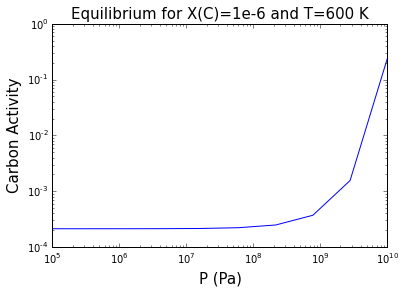

In [32]:
fig = plt.gca()
fig.plot(data['P'], np.exp(data['MU'].sel(T=600, X_C=1e-6, component='C')/(8.3145*600)))
fig.set_title('Equilibrium for X(C)=1e-6 and T=600 K', fontsize=15)
fig.set_xlabel('P (Pa)', fontsize=15)
fig.set_ylabel('Carbon Activity', fontsize=15)
fig.set_yscale('log')
fig.set_xscale('log')